# Intro to matplotlib

Matplotlib is a data visualization library in Python that
provides a wide range of functions and tools for creating
different types of plots and charts. It is one of the most
widely used data visualization libraries in the Python
ecosystem and is often used in conjunction with other
libraries such as NumPy and Pandas.

### Import libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

### Import data

In [52]:
df = pd.read_csv("data/Adidas US Sales Datasets.csv")

In [53]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [54]:
# converting 'Units Sold' from str to int by using the apply function
def convert_str_to_int(text):
    text = text.replace(
        ",", ""
    )  # replace the comma in the string to avoid getting errors
    converted_text = int(text)  # coverting the string to an integer
    return converted_text


df["Units Sold"] = df["Units Sold"].apply(convert_str_to_int)

In [55]:
# group data by retailer
grouped_by_retailer = df.groupby("Retailer")

In [56]:
# calculate total sales volume per retailer
total_sales_volume_retailer = []

for group in grouped_by_retailer:
    group_name, group_data = group

    total_units_sold = group_data["Units Sold"].sum()
    total_sales_volume_retailer.append([group_name, total_units_sold])

In [62]:
# create new dataframe from total sales
df_total_volume = pd.DataFrame(
    data=total_sales_volume_retailer, columns=["retailer", "total_volume"]
)

### Plotting data

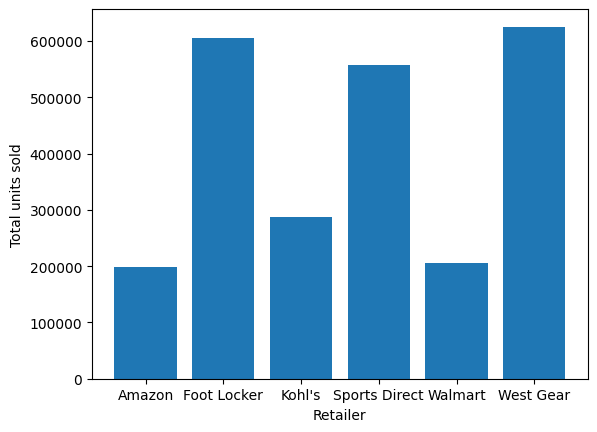

In [64]:
# plot bar chart of total units sold by each retailer
plt.bar(
    x=df_total_volume["retailer"],  # data to be displayed on the x-axis,
    height=df_total_volume["total_volume"],  # data to be displayed on the y-axis
)
plt.xlabel("Retailer")  # label the x-axis
plt.ylabel("Total units sold")  # label the y-axis
plt.show()  # display the bar chart

### Plotting a pie chart showing market share

In [59]:
# converting 'Price per unit' from str to int by using the apply function
def convert_str_to_float(text):
    text = text.replace(
        "$", ""
    )  # replace the $ in the string to prevent errors during conversion
    converted_text = float(text)  # coverting the string to an float
    return converted_text


df["Price per Unit"] = df["Price per Unit"].apply(convert_str_to_float)

In [60]:
# Price per unit is now a float and not a string
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200,"$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,"$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40.0,1000,"$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60.0,900,"$540,000","$162,000",30%,In-store


In [65]:
# calculate total sales in $ per retailer
total_sales_per_retailer = []

for group in grouped_by_retailer:
    group_name, group_data = group

    total_sales = group_data["Units Sold"] * group_data["Price per Unit"]
    total_sales_per_retailer.append([group_name, total_sales])

In [66]:
# create new dataframe from total sales
df_total_sales = pd.DataFrame(
    data=total_sales_volume_retailer, columns=["retailer", "total_sales"]
)

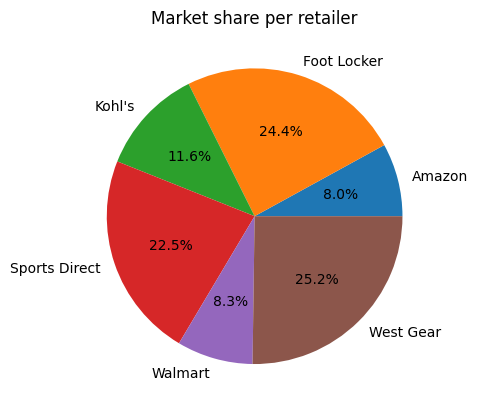

In [72]:
plt.pie(
    x=df_total_sales["total_sales"],  # data used to divide the pie chart
    labels=df_total_sales["retailer"],  # label added to each pie section
    autopct=lambda percentage: f"{percentage:.1f}%",  # display the percantage of each section to 1 decimal place
)
plt.title("Market share per retailer")
plt.show()